# Atividade 01 - Parte 01: Inventário de emissões utilizando Python


#### Alunos: Matheus Henrique Lourenço de Oliveira (19205617) e Mayara Dargas Sousa (20203642)

# Etapa 01: Introdução

O presente estudo tem o objetivo de realizar uma estimativa das emissões de Material Particulado (PM), Óxidos de Nitrogênio (NOx), Dóxido de Enxofre (SO2) e Dióxido de carbono (CO2) com base em dados do Relatório de ESG do grupo MOHAWK, o qual a marca Eliane revestimentosfaz parte. Foi utilizado o capítulo 11.7 da AP42, pois o empreendimento trata-se de uma Indústria de Revestimentos Cerâmicos (https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf).

Os valores descritos na tabela seguir apresenta os fatores de emissão fornecidos pela AP-42, os quais foram convertidos de lb/ton para kg/ton, conforme instruções da Ap-42. Para o dióxido de enxofre (SO2), foi adotado o valor citado na referência: "Reference 10. For facilities using raw material with a sulfur content greater than 0.07 percent. The variable S represents the raw material sulfur content (percent). For facilities using raw material with a sulfur content less than or equal to 0.07 percent, use 9.5 S lb/ton to estimate emissions.”

## Fluxograma do processo produtivo

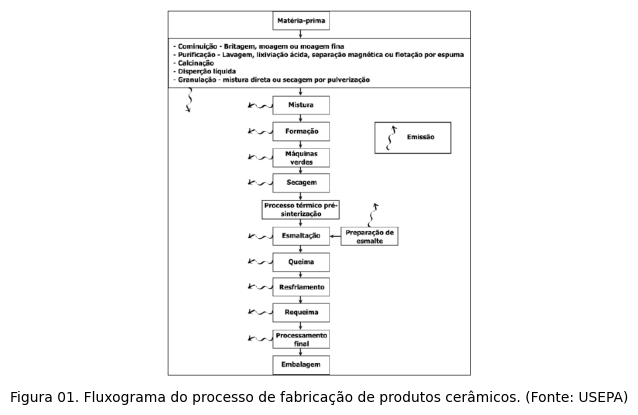

In [3]:
import matplotlib.pyplot as plt

# Caminho para a imagem no seu computador
caminho_imagem = 'C:\\Users\\mayar\\Downloads\\Captura de tela 2024-05-03 221653.png' 

# Carregar a imagem usando plt.imread()
imagem = plt.imread(caminho_imagem)

# Exibir a imagem usando plt.imshow()
plt.imshow(imagem)
plt.axis('off')  # Oculta os eixos

# Adicionar legenda
plt.text(0.5, -0.05, 'Figura 01. Fluxograma do processo de fabricação de produtos cerâmicos. (Fonte: USEPA)',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

#VERIFICAR SE MANTEMOS O FLUXOGRAMA, ACHEI MEIO FEIO

# Etapa 02: Planilha de fatores de emissões compilada

In [4]:
import pandas as pd
import os
from IPython.display import display

# Coletando o caminho da pasta que estamos
caminho_atual = os.getcwd()

# Definindo o caminho da pasta dos fatores de emissão
caminho_fe = os.path.join(caminho_atual, 'tabelas', 'FE')

# Indicando o número do capítulo e subcapítulo
capitulo = 11
subcapitulo = 7

# Construindo o nome do arquivo
nome_arquivo = f'chp_{capitulo}_{subcapitulo}.csv'

# Caminho completo do arquivo
caminho_arquivo = os.path.join(caminho_fe, nome_arquivo)

# Abrindo o arquivo utilizando o Pandas
fe = pd.read_csv(caminho_arquivo)

# Estilizando a planilha com cores alternadas para as linhas e colunas
styled_fe = fe.style.set_properties(**{'text-align': 'center'}) \
                     .set_table_styles([
                         {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
                         {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
                         {'selector': 'th', 'props': [('background-color', '#e6e6e6')]},
                         {'selector': 'td', 'props': [('background-color', 'white')]}
                     ])

# Exibindo a planilha estilizada na tela
display(styled_fe)


,Source,PM,SO2,NOX
0,Comminution,0.060000,nan,nan
1,Dryer,1.150000,nan,nan
2,Cooler,0.055000,nan,nan
3,Granulation,0.095000,nan,nan
4,Firing natural gas,0.245000,4.750000,0.270000
5,Refiring natural gas,0.033500,nan,nan
6,Ceramic glaze spray booth,0.900000,nan,nan


## Estimativa da produção: premissas adotadas e valores fornecidos

Conforme dados institucionais de 2021, a Eliane revestimentos produz 40.8 milhões de m² de revestimento por ano, distribuídos em 6 unidades em todo o Brasil. Assumindo a premissa de que cada unidade produz a mesma quantidade, a unidade de interesse, em Criciúma - SC, produziria aproximadamente 6.8 milhões de m² de revestimento.

Além disso, de modo a estimar este valor em toneladas, foram utilizados os valores de peso e medida do modelo mais vendido da fábrica, o porcelanato Bianco plus NA 60X60 com as seguintes especificações técnicas:

- Peso da caixa: 30,38 kg
- Rendimento: 1,44 m²

Portanto, se: 

30,38 kg ----- 1,44 m² 

   X     ----- 6.8 x 10^6 m²

X = 143.46111 x 10^6 kg = 143461,11 toneladas/ano 

ou então, 

11955,09 toneladas/mês  e 393,04 ton/dia. Também assumindo a premissa de uma escala produtiva uniforma ao longo do ano.

## Plotando os fatores de emissão

364176.02773499995
1
2
3


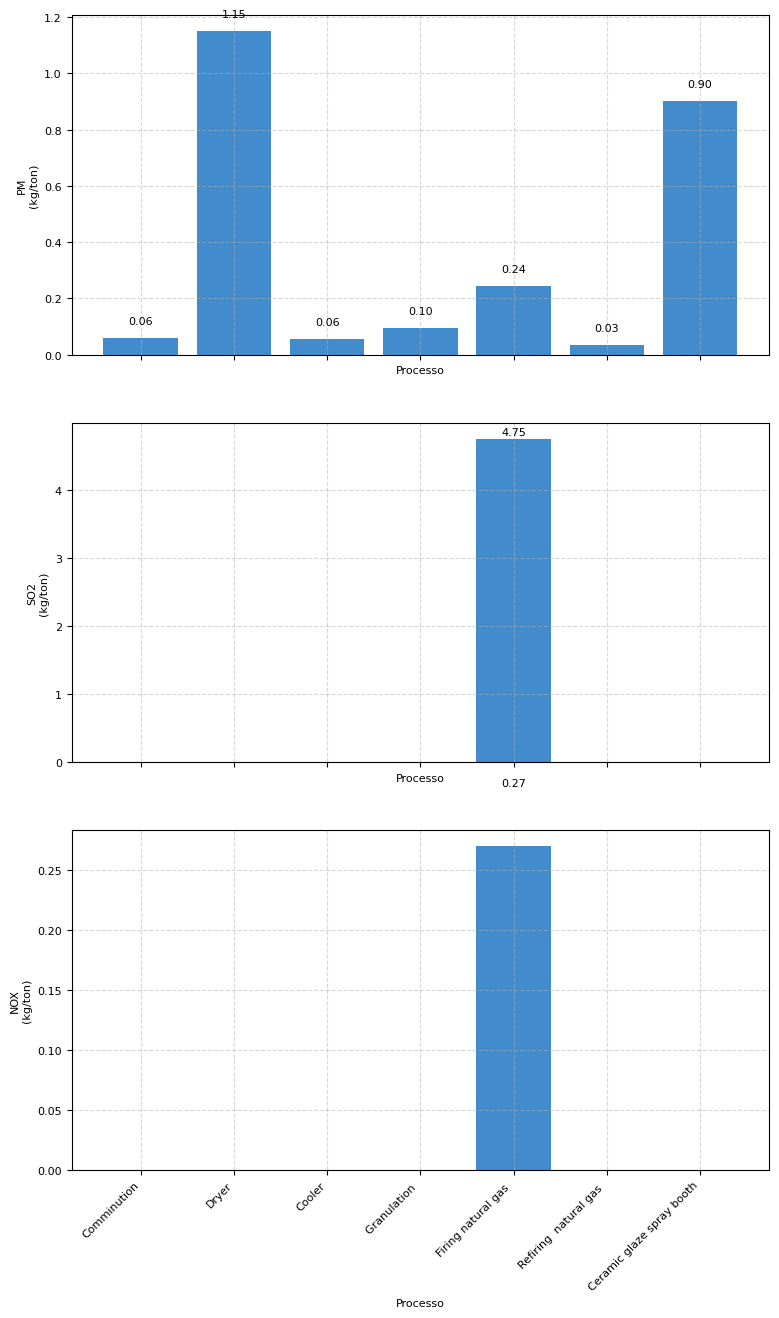

In [5]:
import matplotlib.pyplot as plt
import numpy as np

atv = 143461.11  # A unidade descrita aqui é toneladas. Os processos para determinar este valor estão descritos anteriormente
emis = fe['PM'] * atv

cwd = os.getcwd()

# Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex=True, figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)):
    print(ii)
    ax[ii - 1].bar(fe['Source'], fe.iloc[:, ii], color=['#428CCD'])
    ax[ii - 1].set_xlabel('Processo', fontsize=8)  # Define o tamanho da fonte para o eixo x
    ax[ii - 1].set_ylabel(fe.columns[ii] + '\n(kg/ton)', fontsize=8)  # Define o tamanho da fonte para o eixo y

    # Define o tamanho da fonte para os rótulos dos ticks nos eixos x e y
    ax[ii - 1].tick_params(axis='x', labelsize=8)
    ax[ii - 1].tick_params(axis='y', labelsize=8)

    # Define os rótulos dos ticks nos eixos x
    ax[ii - 1].set_xticks(fe['Source'].index)  # Define a localização dos ticks no eixo x
    ax[ii - 1].set_xticklabels(fe['Source'], rotation=45, ha='right', fontsize=8)  # Define os rótulos dos ticks no eixo x

    # Adicionando linhas de grade
    ax[ii - 1].grid(True, linestyle='--', alpha=0.5)

    # Adicionando rótulos nos topos das barras
    for x, y in zip(fe['Source'], fe.iloc[:, ii]):
        if np.isfinite(y):  # Verifica se o valor de y é finito
            ax[ii - 1].text(x, y + 0.05, f'{y:.2f}', ha='center', fontsize=8)

# Salva a figura na pasta figures
fig.savefig(cwd + '\\figures\\barplot_fatorEmiss.png')

plt.show()


## Processo do empreendimento que possui maior emissão

Não é possível avaliar de forma precisa qual o processo do empreendimento que produz mais poluentes devido a ausência de valores de fatores de emissão para todos os processos mencionados. Entretanto, se for avaliado apenas a emissão de partículado, o processo que possui a maior emissão ao longo de um ano é a o secador ou "dryer".

# Etapa 03: Criando taxa de atividade aleatória com sazonalidade

Considerando que há apenas um dado anual disponível, a taxa de atividade foi convertida para toneladas por dia, resultando em um valor de aproximadamente 393,04 ton/dia. Reconhecendo que a produção não é um valor constante e que a produtividade pode variar de um dia para outro, será considerado um cenário hipotético. Onde a taxa de atividade é calculada estipulando uma faixa de valores a partir de atividades máximas e mínimas, em que foi considerado uma variação de 393,04 ±0,5 ton/dia.


## Série temporal das emissões mensais do empreendimento

      Atividade
0    392.854312
1    393.311642
2    392.617199
3    393.239575
4    392.815202
..          ...
995  392.756972
996  392.685066
997  393.173179
998  392.740742
999  393.268159

[1000 rows x 1 columns]


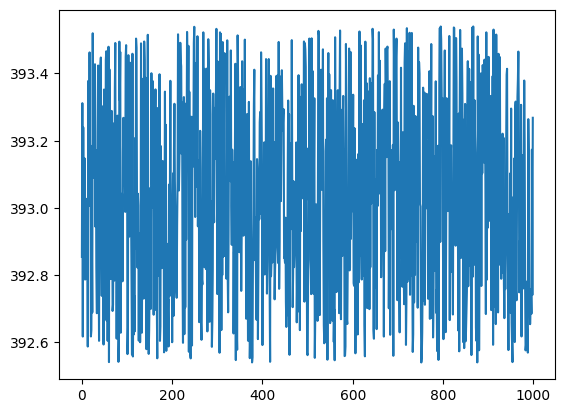

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Criando vetor de valores aleatórios
atvMax = 393.54
atvMin = 392.54
n = 1000
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
#print(atv)

# Exportando os dados para um arquivo .csv
output_folder = 'outputs'
output_file = 'dados_aleatorios.csv'
output_path = os.path.join(output_folder, output_file)

# Criando DataFrame com os dados aleatórios
df = pd.DataFrame({'Atividade': atv})
print(df)

# Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)
plt.show()


In [7]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month


#criar um array de 1 a 365 e colocar igual a df['Dia']
df['Dia do Ano'] = df['Data'].dt.dayofyear  

# Mostrar o DataFrame resultante
print(df)


          Data  Mes  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


          Data  Mes  Dia do Ano   atividade
0   2024-01-01    1           1  393.473131
1   2024-01-02    1           2  392.949671
2   2024-01-03    1           3  392.663291
3   2024-01-04    1           4  392.634563
4   2024-01-05    1           5  393.196728
..         ...  ...         ...         ...
361 2024-12-27   12         362  392.569928
362 2024-12-28   12         363  393.147217
363 2024-12-29   12         364  393.228938
364 2024-12-30   12         365  392.827212
365 2024-12-31   12         366  393.029871

[366 rows x 4 columns]


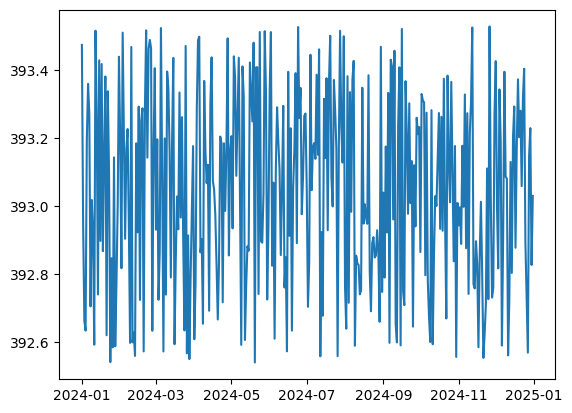

In [8]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)

#Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()
ax.plot(datas, atv)
plt.show()


0      1.999852
1      1.999407
2      1.998667
3      1.997630
4      1.996298
         ...   
361    1.998667
362    1.999407
363    1.999852
364    2.000000
365    1.999852
Name: Dia do Ano, Length: 366, dtype: float64


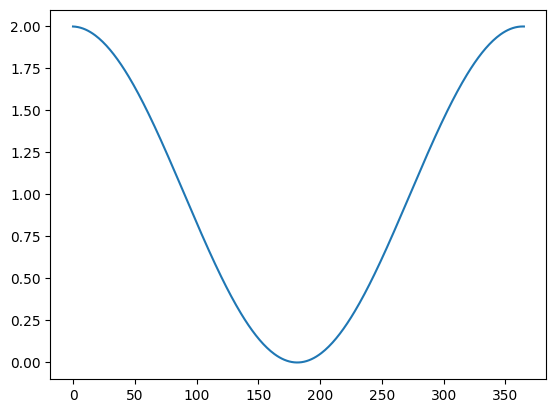

In [9]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365)+1 
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade 
df.to_csv 
print(sazonalidade)


In [12]:
#Variablidade com Monte Carlo
import numpy as np

# Gerando variabilidade usando o método Monte Carlo
df['variabilidade'] = np.random.rand(len(df)) * (atvMax - atvMin) + atvMin

# Definindo a produção diária aplicando variabilidade
df['producao_diaria'] =  df['variabilidade'] + df['sazonalidade'] #modelar a sazonalidade pra média dos valores baterem que a média que eu estipulei com monte carlo seja coerente com a média da sazonalidade da sazonalidade e da 

#média da componaente aleatroia mais a média da componente sazonal tem que dar a média da traxa de atividade diária #plt.plot(df['Mes'], df['variabilidade'])
#soamndo todos os dias da a taxa anual então tem que modelar pra bater 
# Salvando o DataFrame em um arquivo CSV dentro da pasta "outputs"
output_folder = 'outputs/'
output_filename = 'dataframe_output.csv'
df.to_csv(output_folder + output_filename, index=False)

print (df)


          Data  Mes  Dia do Ano   atividade  sazonalidade  variabilidade  \
0   2024-01-01    1           1  393.473131      1.999852     393.425062   
1   2024-01-02    1           2  392.949671      1.999407     392.751489   
2   2024-01-03    1           3  392.663291      1.998667     393.033967   
3   2024-01-04    1           4  392.634563      1.997630     392.981845   
4   2024-01-05    1           5  393.196728      1.996298     392.754533   
..         ...  ...         ...         ...           ...            ...   
361 2024-12-27   12         362  392.569928      1.998667     393.203209   
362 2024-12-28   12         363  393.147217      1.999407     393.228794   
363 2024-12-29   12         364  393.228938      1.999852     393.477191   
364 2024-12-30   12         365  392.827212      2.000000     392.687188   
365 2024-12-31   12         366  393.029871      1.999852     393.084722   

     producao_diaria  
0         395.424914  
1         394.750897  
2         395.0326

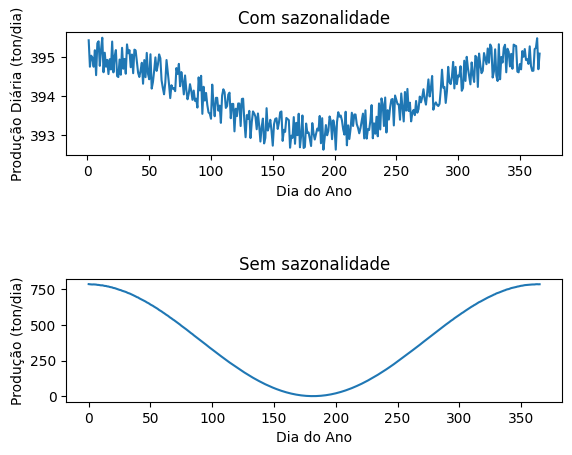

In [13]:
# Vamos usar essa coluna para o eixo x no gráfico
fig, ax = plt.subplots(2)

# Plotagem do segundo gráfico
ax[1].plot(df['atividade']*df['sazonalidade'])
ax[1].set_title('Sem sazonalidade')
ax[1].set_xlabel('Dia do Ano')
ax[1].set_ylabel('Produção (ton/dia)')

# Plotagem do primeiro gráfico
ax[0].plot(df['Dia do Ano'], df['producao_diaria'])
ax[0].set_title('Com sazonalidade')
ax[0].set_xlabel('Dia do Ano')
ax[0].set_ylabel('Produção Diária (ton/dia)')

# Adicionando espaço entre os gráficos
plt.subplots_adjust(hspace=1)

plt.show()


## Variabilidade temporal da taxa de atividade

Através da análise dos gráficos, pôde-se constatar que a taxa de atividade "Sem Sazonalidade" é consistentemente superior àquela que leva em consideração uma sazonalidade aleatória. Isso ocorre porque os valores da primeira mantêm um comportamento estável ao longo do ano.

# Etapa 04: Estimando emissões

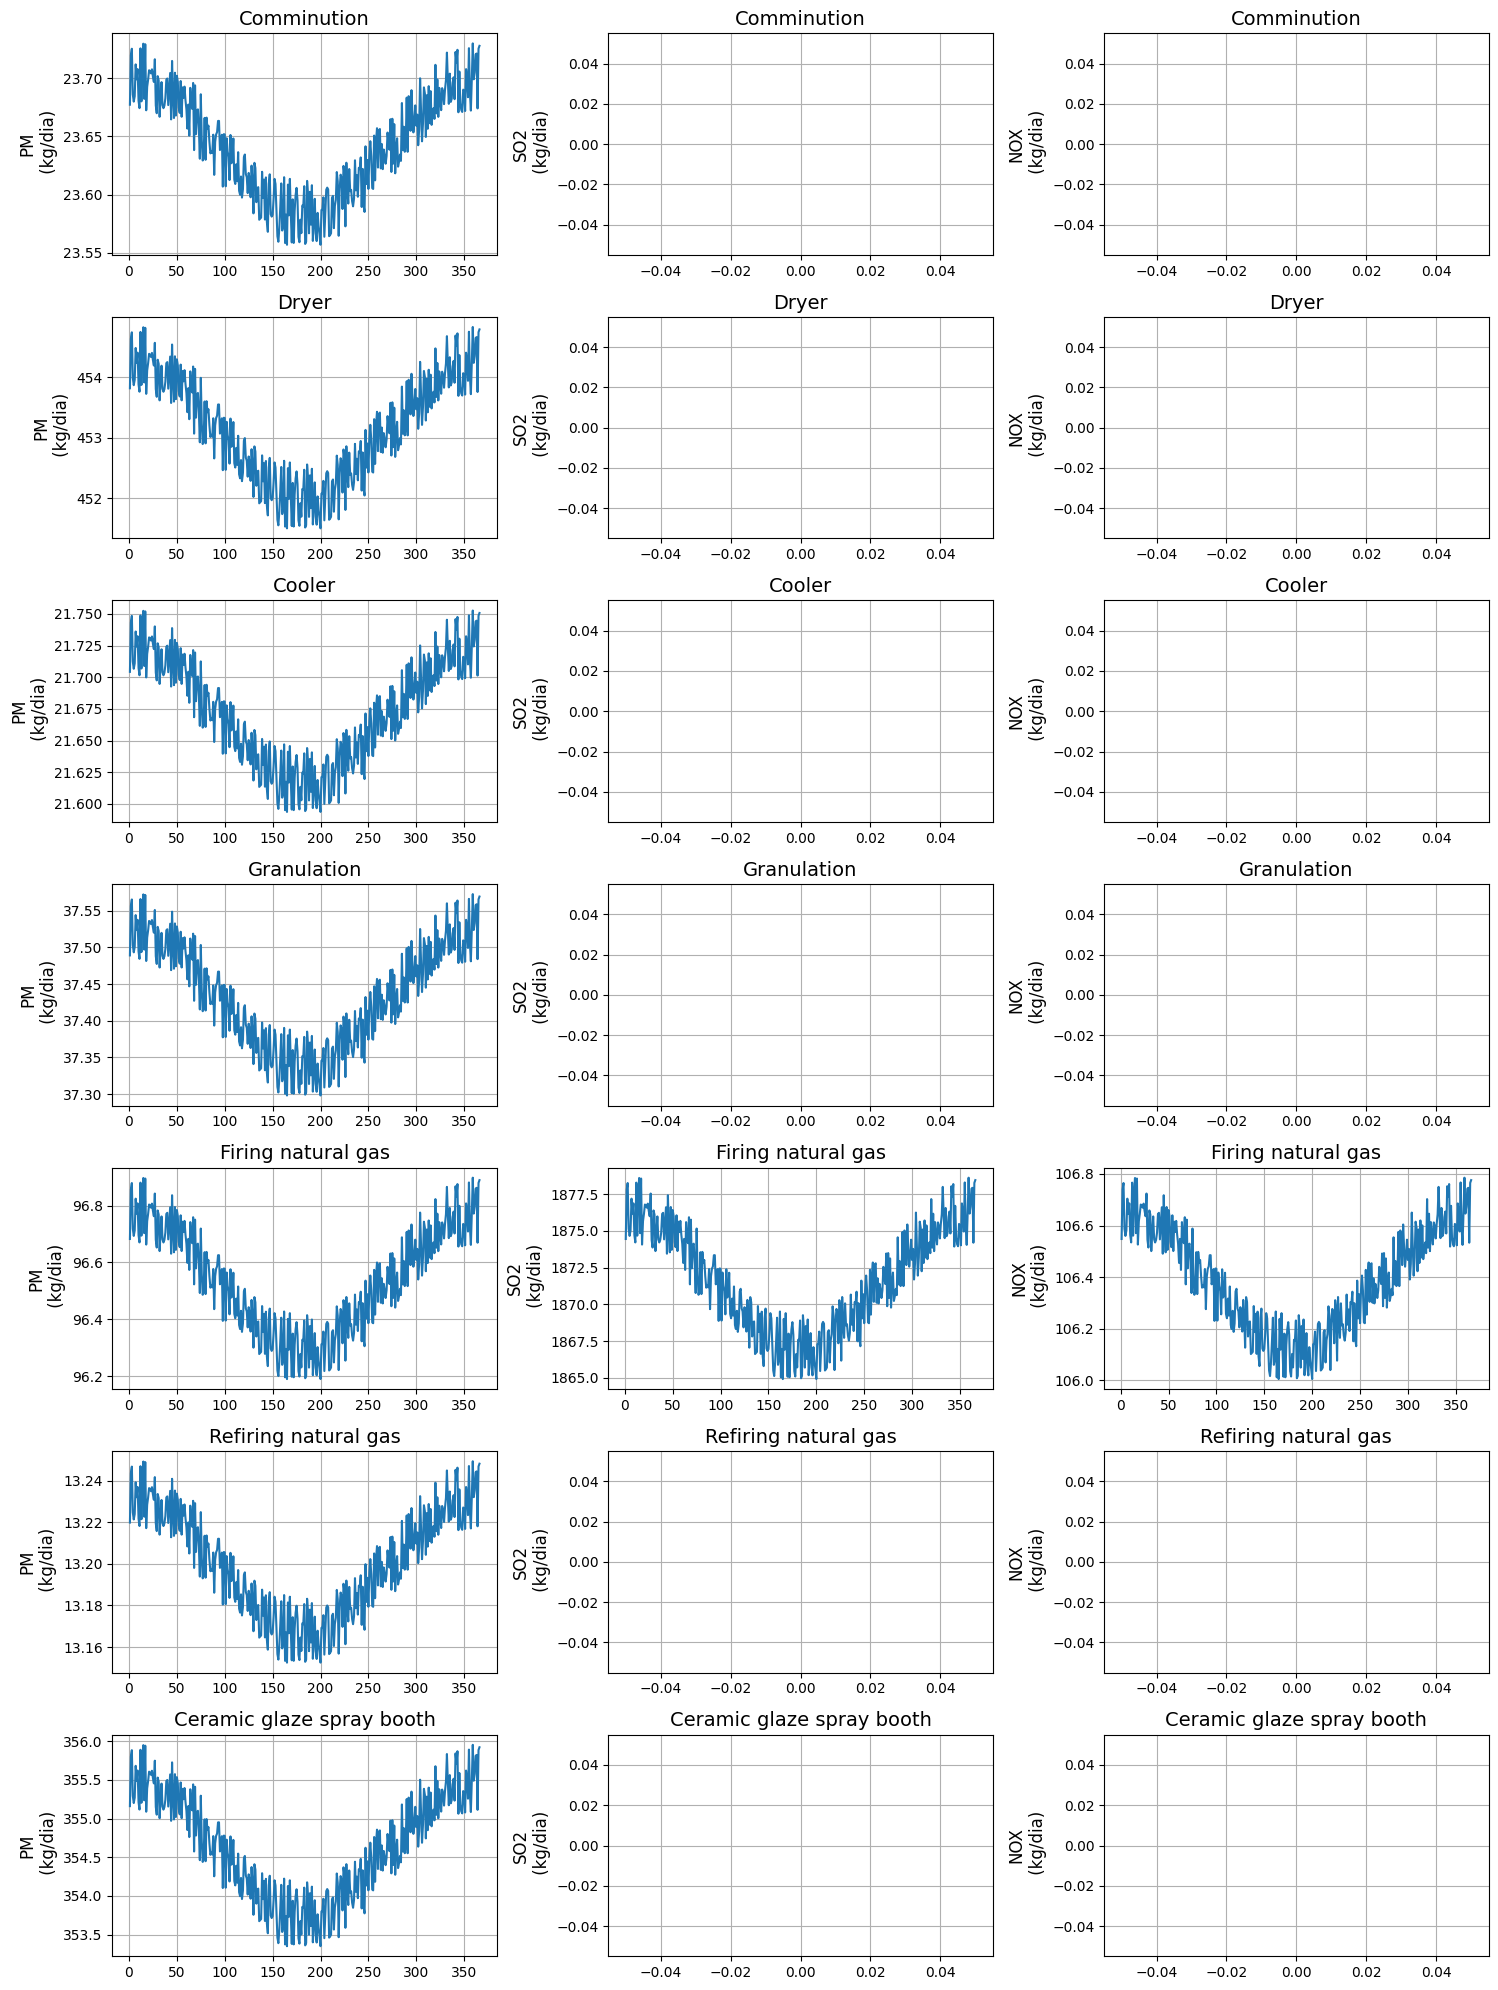

In [56]:
import matplotlib.pyplot as plt

# Definindo os processos e seus respectivos títulos
processos = [
    ('Comminution', 0),
    ('Dryer', 1),
    ('Cooler', 2),
    ('Granulation', 3),
    ('Firing natural gas', 4),
    ('Refiring natural gas', 5),
    ('Ceramic glaze spray booth', 6)
]

# Criando subplots para cada processo
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
for idx, (processo, idx_fe) in enumerate(processos):
    for ii in range(1, 4):
        ax = axs[idx, ii-1]
        ax.plot(df['Dia do Ano'], df['producao_diaria']*fe.iloc[idx_fe, ii])
        ax.set_ylabel(fe.columns[ii]+'\n (kg/dia)', fontsize=12)
        ax.set_title(processo, fontsize=14)  # Adicionando o título do processo em cada gráfico
        ax.grid(True)  # Adicionando linhas de grade
plt.tight_layout()
plt.show()

## Emissões mensais

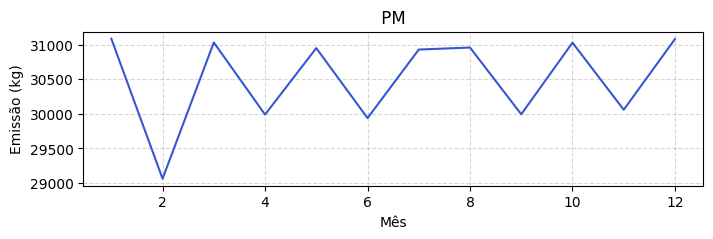

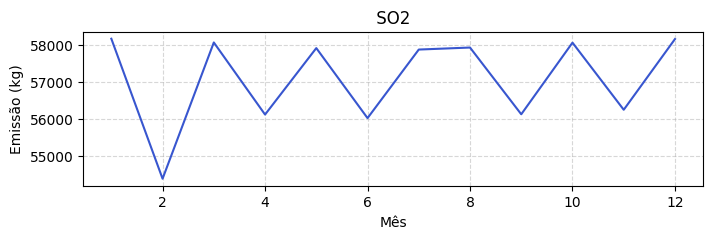

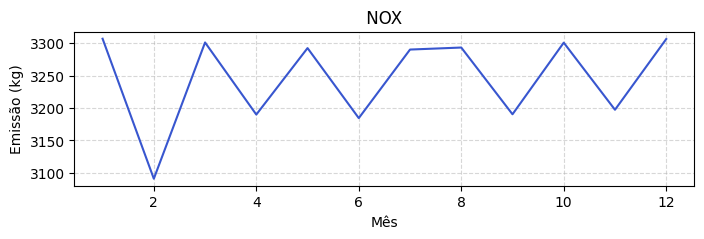

In [66]:
# Transformar o dicionário 'emissoes_mensais' em um DataFrame
df_emissoes_mensais = pd.DataFrame(emissoes_mensais)

# Calcular a emissão total mensal para cada poluente
emissoes_mensais_total = df_emissoes_mensais.copy()  # Criar uma cópia do DataFrame de emissões mensais

# Plotar os gráficos de emissão para cada poluente
for poluente in fe.columns[1:]:
    # Criar uma série pandas para armazenar a emissão mensal total para o poluente
    emissao_mensal_total = pd.Series(dtype='float64')
    
    # Somar as emissões de todos os processos para o poluente
    for col_name in emissoes_mensais_total.columns:
        if poluente in col_name:  # Verificar se o nome do poluente está no nome da coluna
            emissao_mensal_total = emissao_mensal_total.add(emissoes_mensais_total[col_name], fill_value=0)
    
    # Plotar o gráfico de emissão para o poluente
    plt.figure(figsize=(8, 2))
    plt.plot(emissao_mensal_total.index, emissao_mensal_total.values, color='#3856CF')
    plt.title(f' {poluente} ')
    plt.xlabel('Mês')
    plt.ylabel('Emissão (kg)')
    plt.grid(True, linestyle='--', alpha=0.5)  # Adicionando linhas de grade
    plt.show()

## Soma das emissões considerando todos os processos 

In [18]:
# Cálcula emissões para cada poluente
labels = ['PM', 'SO2', 'NOX']
for label in labels:
    # Obtém o índice do poluente no dataframe de fatores de emissão
    idx_poluente = fe.columns.get_loc(label)

    # Soma os fatores de emissão de cada processo para o poluente atual
    SomaFE = fe.iloc[:, idx_poluente].sum()

    # Calcula a emissão total do poluente
    emissSoma = round(df['producao_diaria'].sum() * SomaFE, 2)

    # Imprime o resultado
    print(f'A soma das emissões de {label} foi de {emissSoma} kg')


A soma das emissões de PM foi de 366105.39 kg
A soma das emissões de SO2 foi de 685050.47 kg
A soma das emissões de NOX foi de 38939.71 kg


## Emissão média, mínima e máxima

In [19]:
import pandas as pd

# Calcular as emissões totais para cada combinação de processo e poluente
emissoes_totais = {}
for idx, processo in enumerate(fe['Source']):
    for poluente in fe.columns[1:]:
        # Multiplicar a produção diária pela emissão específica de cada poluente para cada processo
        col_name = f'{processo}_{poluente}'  # Criar um nome de coluna único para cada combinação de processo e poluente
        emissoes_totais[col_name] = df['producao_diaria'] * fe.loc[idx, poluente]

# Transformar o dicionário em um DataFrame
df_emissoes_totais = pd.DataFrame(emissoes_totais)

# Calcular a emissão média, mínima e máxima para cada poluente
resultados_emissoes = {}
for poluente in fe.columns[1:]:
    # Criar uma série pandas para armazenar a emissão total para o poluente
    emissao_total = pd.Series(dtype='float64')
    
    # Iterar sobre as colunas do DataFrame de emissões totais
    for col_name in df_emissoes_totais.columns:
        if poluente in col_name:  # Verificar se o nome do poluente está no nome da coluna
            # Adicionar as emissões para o poluente atual
            emissao_total = emissao_total.add(df_emissoes_totais[col_name], fill_value=0)
    
    # Calcular a emissão média, mínima e máxima
    emissao_media = emissao_total.mean()  # Média das emissões totais
    emissao_minima = emissao_total.min()  # Mínima das emissões totais
    emissao_maxima = emissao_total.max()  # Máxima das emissões totais
    
    # Armazenar os resultados para o poluente atual
    resultados_emissoes[poluente] = {
        'Emissão Média (g/s)': emissao_media,
        'Emissão Mínima (g/s)': emissao_minima,
        'Emissão Máxima (g/s)': emissao_maxima
    }

# Exibe os resultados para cada poluente
for poluente, resultados in resultados_emissoes.items():
    print(f"Resultados para o poluente '{poluente}':")
    for chave, valor in resultados.items():
        print(f"{chave}: {valor} ")
    print()  # Adiciona uma linha em branco após cada conjunto de resultados


Resultados para o poluente 'PM':
Emissão Média (g/s): 1000.2879555626946 
Emissão Mínima (g/s): 996.7066402549306 
Emissão Máxima (g/s): 1003.9516909101437 

Resultados para o poluente 'SO2':
Emissão Média (g/s): 1871.7225877182586 
Emissão Mínima (g/s): 1865.0212886393224 
Emissão Máxima (g/s): 1878.5781098377713 

Resultados para o poluente 'NOX':
Emissão Média (g/s): 106.39265235451155 
Emissão Mínima (g/s): 106.01173640686676 
Emissão Máxima (g/s): 106.78233466446281 



In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando os resultados para cada poluente individualmente
df_pm = df_resultados_emissoes.loc['PM']
df_so2 = df_resultados_emissoes.loc['SO2']
df_nox = df_resultados_emissoes.loc['NOX']

# Criando uma grade de subplots com uma linha e três colunas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotando o boxplot para o poluente PM no primeiro subplot (azul)
sns.boxplot(data=df_pm, ax=axes[0], color='#428CCD')
axes[0].set_title('')
axes[0].set_xlabel('Distribuição das Emissões de PM')
axes[0].set_ylabel('Emissão (g/s)')
axes[0].grid(True)

# Plotando o boxplot para o poluente SO2 no segundo subplot (verde)
sns.boxplot(data=df_so2, ax=axes[1], color='#4CAF50')
axes[1].set_title('')
axes[1].set_xlabel('Distribuição das Emissões de SO2')
axes[1].set_ylabel('Emissão (g/s)')
axes[1].grid(True)

# Plotando o boxplot para o poluente NOx no terceiro subplot (laranja)
sns.boxplot(data=df_nox, ax=axes[2], color='#FFA500')
axes[2].set_title('')
axes[2].set_xlabel('Distribuição das Emissões de NOX')
axes[2].set_ylabel('Emissão (g/s)')
axes[2].grid(True)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


NameError: name 'df_resultados_emissoes' is not defined

Os gráficos acima ilustram as variações nas emissões máxima, média e mínima para cada poluente avaliado. Observa-se que o NOX exibe uma diferença relativamente pequena entre suas emissões máxima e mínima em comparação com a média, indicando um comportamento mais constante ao longo do tempo. Por outro lado, o SO2 demonstra uma variação mais significativa, de aproximadamente 14 g/s, sugerindo um comportamento mais variável em suas emissões ao longo do período analisado.

In [ ]:
#gráfico de barra por processo s#barcom error bar faz um gráfico por processo 

### Referências

- https://mohawkind.com/_pdf/Eliane_2022_ESG_PT.pdf
- https://www.eliane.com/institucional
- https://www.eliane.com/produtos/bianco-plus-na-60x60-sc-8017071 